<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/HW5_Decision_Tree_and_Random_Forest_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/heart failure.csv'
df=pd.read_csv(path)
df.head(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#df.to_csv('new.csv') to save/download your current csv file in your device

In [ ]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

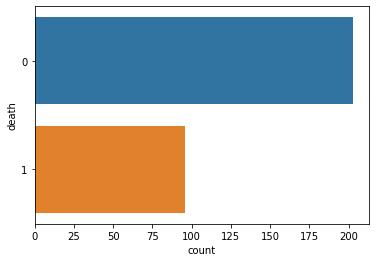

In [ ]:
sns.countplot(y='death',data=df)

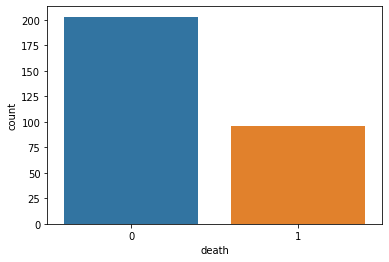

In [ ]:
sns.countplot(x='death',data=df)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5af25df490>,)

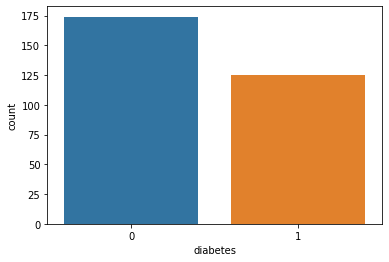

In [ ]:
sns.countplot(x='diabetes', data=df) , #='death')

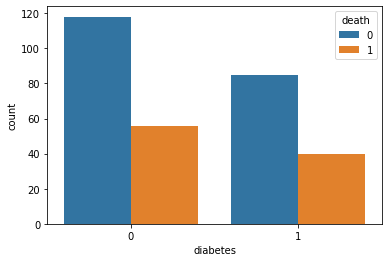

In [ ]:
sns.countplot(x='diabetes', data=df, hue='death')

In [ ]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

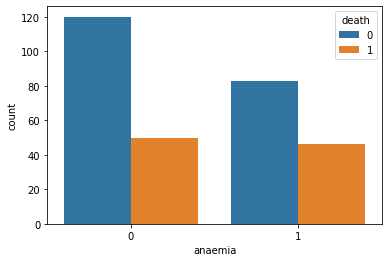

In [ ]:
sns.countplot(x='anaemia', data=df, hue='death')

In [ ]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

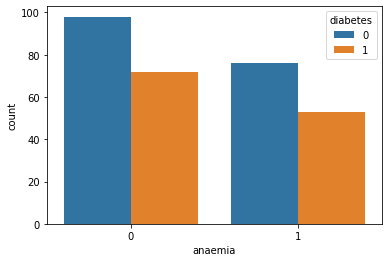

In [ ]:
sns.countplot(x='anaemia', data=df, hue='diabetes')

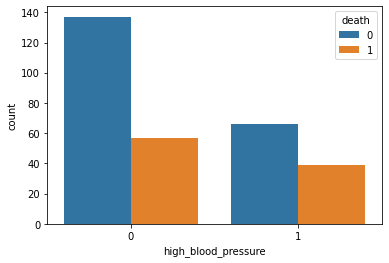

In [ ]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [ ]:
#Target
y = df['death']
y.head(3)

0    1
1    1
2    1
Name: death, dtype: int64

In [ ]:
#Features
X=df.copy()
X = df.drop('death',axis=1)
X.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.70,random_state=42)

In [ ]:
y_test

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [ ]:
y_test.shape

(90,)

In [ ]:
X_train.shape

(209, 12)

# Apply Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test) # pred is corrsponding to ytest

In [ ]:
y_test.head(3)

281    0
265    0
164    1
Name: death, dtype: int64

In [ ]:
y_pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [ ]:
import numpy as np
np.array(y_test) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

# Evaluate the ML model

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [ ]:
classification_report(y_test,y_pred) 

'              precision    recall  f1-score   support\n\n           0       0.70      0.81      0.75        53\n           1       0.66      0.51      0.58        37\n\n    accuracy                           0.69        90\n   macro avg       0.68      0.66      0.67        90\nweighted avg       0.68      0.69      0.68        90\n'

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        53
           1       0.57      0.43      0.49        37

    accuracy                           0.63        90
   macro avg       0.62      0.60      0.60        90
weighted avg       0.62      0.63      0.62        90



In [ ]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
test_confusion_matrix

array([[41, 12],
       [21, 16]])

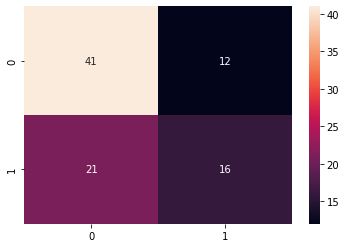

In [ ]:
sns.heatmap(test_confusion_matrix, annot=True)

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)

**1. Accuracy of Decision Tree**

In [ ]:
dt.score(X_test,y_test)

0.6333333333333333

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier() # default n_estimators=100 ; 100 trees

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

**2. Accuracy of Random Forest**

In [ ]:
clf.score(X_test, y_test)

0.7666666666666667

**n_estimators validation plot**

Text(0, 0.5, 'Testing Accuracy')

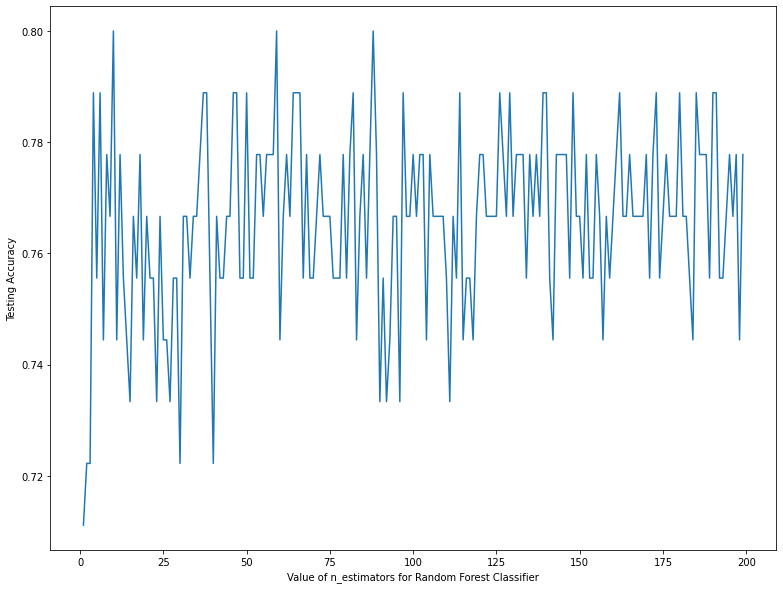

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores= []
for k in range(1,200):
	rfc_val=RandomForestClassifier (n_estimators=k)
	rfc_val.fit(X_train, y_train)
	y_pred = rfc_val.predict(X_test)
	scores.append (accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(1,200),scores)
plt.xlabel ('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

# Optimization of Random Forest Algorithm

# Tuning Random Forest using Randomized Search CV

In [ ]:
# Randomized: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# Grid Search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

**Parameters Tuning**

In [ ]:
n_estimators = [int(X) for X in np.linspace(start=15, stop=200, num=20)]
n_estimators

[15,
 24,
 34,
 44,
 53,
 63,
 73,
 83,
 92,
 102,
 112,
 122,
 131,
 141,
 151,
 161,
 170,
 180,
 190,
 200]

In [ ]:
min_samples_split = np.random.randint(1,12,15)
len(min_samples_split)

15

In [ ]:
n_estimators = np.random.randint(15,150,30)
n_estimators

array([ 64,  97,  63, 125,  88, 147, 108, 110, 140, 124,  89, 149, 100,
       129, 105, 140,  48, 115,  48,  87,  96,  80,  95, 103,  49,  77,
        60, 100, 126, 136])

In [ ]:
#Assign Parameters
n_estimators = np.random.randint(15,200,40)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = np.random.randint(1,10,20)
min_samples_split = np.random.randint(1,10,15) #[1,2,3,4]
min_samples_leaf= np.random.randint(1,4,15)  #[ 1,2,3,4]

parameters = {
    'n_estimators'  : n_estimators,
    'criterion' : criterion,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [ ]:
print(parameters)

{'n_estimators': array([140,  72, 106, 173, 168, 125,  91, 160,  55,  19,  97, 179,  86,
        61, 132,  78, 162, 108,  67,  86, 195,  63, 142, 195, 117,  80,
        56, 198,  63, 127, 163, 191,  98, 151,  49,  21, 175, 145,  93,
        71]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([8, 5, 8, 5, 3, 5, 7, 3, 9, 2, 4, 4, 7, 6, 3, 5, 4, 8, 4, 9]), 'min_samples_split': array([6, 5, 5, 1, 4, 6, 7, 5, 9, 6, 9, 2, 2, 9, 8]), 'min_samples_leaf': array([2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2])}


In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
r = RandomizedSearchCV(random_forest , parameters, n_iter = 300, cv = 3) #cv = cross validation , clf=RandomForestClassifier()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
r.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([8, 5, 8, 5, 3, 5, 7, 3, 9, 2, 4, 4, 7, 6, 3, 5, 4, 8, 4, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2]),
                                        'min_samples_split': array([6, 5, 5, 1, 4, 6, 7, 5, 9, 6, 9, 2, 2, 9, 8]),
                                        'n_estimators': array([140,  72, 106, 173, 168, 125,  91, 160,  55,  19,  97, 179,  86,
        61, 132,  78, 162, 108,  67,  86, 195,  63, 142, 195, 117,  80,
        56, 198,  63, 127, 163, 191,  98, 151,  49,  21, 175, 145,  93,
        71])})

In [ ]:
r.cv_results_

In [ ]:
result = pd.DataFrame(r.cv_results_)

In [ ]:
result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156231,0.004593,0.014499,0.000153,108,5,2,sqrt,9,gini,"{'n_estimators': 108, 'min_samples_split': 5, ...",0.828571,0.942857,0.869565,0.880331,0.047274,39
1,0.227330,0.008891,0.021022,0.003028,145,4,1,log2,7,gini,"{'n_estimators': 145, 'min_samples_split': 4, ...",0.785714,0.942857,0.855072,0.861215,0.064300,216
2,0.188182,0.006686,0.017451,0.001316,127,6,1,auto,3,gini,"{'n_estimators': 127, 'min_samples_split': 6, ...",0.828571,0.942857,0.855072,0.875500,0.048842,96
3,0.096131,0.006788,0.009661,0.000343,63,6,2,sqrt,5,entropy,"{'n_estimators': 63, 'min_samples_split': 6, '...",0.828571,0.928571,0.826087,0.861077,0.047737,233
4,0.103991,0.003124,0.010429,0.000308,71,6,3,sqrt,4,gini,"{'n_estimators': 71, 'min_samples_split': 6, '...",0.814286,0.957143,0.855072,0.875500,0.060083,96


In [ ]:
r.best_score_

0.8946859903381643

In [ ]:
new_r = r.best_estimator_

In [ ]:
new_r

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=108)

In [ ]:
new_r.fit(X_train, y_train) # RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5,n_estimators=102)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=108)

**3. Accuracy of Random Forest using RandomizedSearchCV Optimizer**

In [ ]:
new_r.score(X_test, y_test)

0.7666666666666667

# Tuning Random Forest using Grid Search CV

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV


**Parameters Tuning**

In [93]:
param_grid = { 
    'n_estimators': [15, 200, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [94]:
print(param_grid)

{'n_estimators': [15, 200, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}


In [95]:
random_forest_01 = RandomForestClassifier()
random_forest_01

RandomForestClassifier()

In [96]:
r_02 = GridSearchCV(random_forest_01, param_grid, cv = 3)
r_02

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 30]})

In [97]:
import warnings
warnings.filterwarnings('ignore')
r_02.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 30]})

In [98]:
print(r_02.cv_results_)

{'mean_fit_time': array([0.02831086, 0.26934155, 0.0433898 , 0.02412717, 0.26943413,
       0.04262408, 0.0225366 , 0.27281896, 0.04285757, 0.02305118,
       0.27994466, 0.04399935, 0.02590362, 0.27661673, 0.04416823,
       0.02351769, 0.27665591, 0.04419033, 0.02516039, 0.28394047,
       0.04832586, 0.02512852, 0.28355153, 0.04315074, 0.02398841,
       0.28756173, 0.04470833, 0.02402035, 0.27728701, 0.04464897,
       0.02444911, 0.28337065, 0.04443463, 0.02294707, 0.28360923,
       0.04332121, 0.02372805, 0.2842679 , 0.04472256, 0.02831229,
       0.27883108, 0.04711278, 0.02437298, 0.28169354, 0.043329  ,
       0.02459701, 0.27562912, 0.04494635, 0.02388136, 0.27947903,
       0.04533203, 0.02329818, 0.28017958, 0.0454274 , 0.02275292,
       0.27733517, 0.04349629, 0.0244592 , 0.27193077, 0.04506874,
       0.02273591, 0.27136238, 0.04521918, 0.02623359, 0.28370738,
       0.04927619, 0.02471534, 0.29025451, 0.04537026, 0.02321529,
       0.27911162, 0.04441961, 0.02329405, 0

In [99]:
result_02 = pd.DataFrame(r_02.cv_results_)
result_02.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028311,0.007003,0.004215,0.000216,gini,2,auto,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.757143,0.871429,0.797101,0.808558,0.047355,108
1,0.269342,0.008125,0.022877,0.000202,gini,2,auto,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.914286,0.811594,0.851484,0.044945,81
2,0.043390,0.001158,0.005634,0.000162,gini,2,auto,30,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.785714,0.800000,0.840580,0.808765,0.023240,107
3,0.024127,0.001892,0.004286,0.000247,gini,2,sqrt,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.757143,0.900000,0.782609,0.813251,0.062216,106
4,0.269434,0.004289,0.024474,0.000901,gini,2,sqrt,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.900000,0.782609,0.827536,0.051729,102


In [100]:
r_02.best_score_

0.8946169772256729

In [101]:
new_r_02 = r_02.best_estimator_ #max_depth=7, max_features='log2', n_estimators=200
new_r_02

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=200)

In [102]:
new_r_02.fit(X_train, y_train) #max_depth=7, max_features='log2', n_estimators=15

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=200)

**4. Accuracy of Random Forest using GridSearchCV Optimizer**

In [103]:
new_r_02.score(X_test, y_test)

0.7777777777777778

#**Accuracy Comparision of Decision Tree, Random Forest and Random Forest with Tuning**

In [104]:
d = 'Accuracy of Decision Tree'
r = 'Accuracy of Random Forest'
r_rs = 'Accuracy of Random Forest using RandomizedSearchCV'
r_gs = 'Accuracy of Random Forest using GridSearchCV'

df1=pd.DataFrame([[d,0.6777777777777778],[r, 0.7666666666666667],  [r_rs, 0.7888888888888889], [r_gs, 0.7777777777777778]],
                 columns=['Accuracy', 'Value'])
df1


,Accuracy,Value
0,Accuracy of Decision Tree,0.677778
1,Accuracy of Random Forest,0.766667
2,Accuracy of Random Forest using RandomizedSear...,0.788889
3,Accuracy of Random Forest using GridSearchCV,0.777778


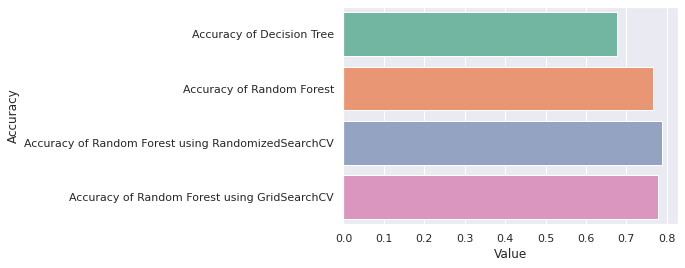

In [105]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df1, palette="Set2")